In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [2]:
# Initializations #
num_classes = 10
channels = 1
height = 28
width = 28
latent = 100
path = '/home/cff/raghav/CGAN/results/'
onehot = np.eye(num_classes)

In [3]:
# Importing data #
def get_data():
    from tensorflow.examples.tutorials.mnist import input_data
    mnist = input_data.read_data_sets("/tmp/data/", one_hot=True, reshape=[])
    return mnist

In [4]:
mnist = get_data()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels
print (x_train.shape)
print (x_train[0].shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(55000, 28, 28, 1)
(28, 28, 1)
(55000, 10)
(10000, 28, 28, 1)
(10000, 10)


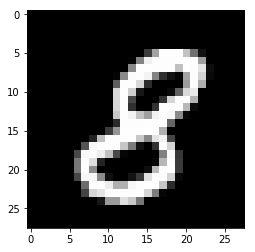

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [6]:
# Visualising #
img = (x_train[5])
img = img.reshape([28,28])
plt.imshow(img, cmap = 'gray')
plt.show()
print (y_train[5])

In [7]:
batch = mnist.train.next_batch(128, shuffle = False)
print (batch[0].shape)

(128, 28, 28, 1)


In [8]:
y_ = np.random.randint(0, 9, (25, 1))
print (y_.reshape([5,5]))

[[3 1 8 6 5]
 [3 1 7 3 6]
 [6 4 5 0 5]
 [7 0 0 1 6]
 [7 7 0 4 4]]


In [9]:
def scale(x):
    x = (x-0.5)/0.5
    return x

In [10]:
def generator(z, ygen, dropout_rate = 0., is_training = True, reuse = False):
    with tf.variable_scope('Generator', reuse = reuse):
        print('\n Generator architecture: ')
        # Layer1
        concat = tf.concat([z,ygen], axis = 3)
        print (concat.shape)
        #?*1*1*110
        
        # Layer 2
        deconv1 = tf.layers.conv2d_transpose(concat, 512, kernel_size = [3,3],
                                         strides = [1,1], padding = 'valid', name = 'deconv1')
        dropout1 = tf.nn.dropout(deconv1, dropout_rate)
        batch1 = tf.layers.batch_normalization(dropout1, training = is_training)
        act1 = tf.nn.leaky_relu(batch1)
        print (act1.shape)
        # ?*3*3*512
        
        # Layer 3
        deconv2 = tf.layers.conv2d_transpose(act1, 256, kernel_size = [5,5],
                                         strides = [1,1], padding = 'valid', name = 'deconv2')
        dropout2 = tf.nn.dropout(deconv2, dropout_rate)
        batch2 = tf.layers.batch_normalization(dropout2, training = is_training)
        act2 = tf.nn.leaky_relu(batch2)
        print (act2.shape)
        #?*7*7*256
        
        # Layer 4
        deconv3 = tf.layers.conv2d_transpose(act2, 128, kernel_size = [4,4],
                                         strides = [2,2], padding = 'same', name = 'deconv3')
        dropout3 = tf.nn.dropout(deconv3, dropout_rate)
        batch3 = tf.layers.batch_normalization(dropout3, training = is_training)
        act3 = tf.nn.leaky_relu(batch3)
        print (act3.shape)
        #?*14*14*128
        
        # Layer 5
        deconv4 = tf.layers.conv2d_transpose(act3, 1, kernel_size = [4,4],
                                         strides = [2,2], padding = 'same', name = 'deconv4')
        act4 = tf.nn.tanh(deconv4)
        print (act4.shape)
        #?*28*28*1
        return act4

In [11]:
# def discriminator(x, ydisc, dropout_rate = 0., is_training = True, reuse = False):
#     with tf.variable_scope('Discriminator', reuse = reuse):
#         print ("\n Discriminator Architecture: ")
#         # Layer1
#         concat = tf.concat([x,ydisc], axis = 3)
#         print (concat.shape)
#         #?*28*28*11
        
#         # Layer2
#         conv1 = tf.layers.conv2d(concat, 128, kernel_size = [4,4],
#                                          strides = [2,2], padding = 'same', name = 'conv1')
#         dropout1 = tf.nn.dropout(conv1, dropout_rate)
#         act1 = tf.nn.leaky_relu(dropout1)
#         print (act1.shape)
#         # ?*14*14*128
        
#         # Layer3
#         conv2 = tf.layers.conv2d(act1, 256, kernel_size = [4,4],
#                                          strides = [2,2], padding = 'same', name = 'conv2')
#         dropout2 = tf.nn.dropout(conv2, dropout_rate)
#         batch2 = tf.layers.batch_normalization(dropout2, training = is_training)
#         act2 = tf.nn.leaky_relu(batch2)
#         print (act2.shape)
#         # ?*7*7*256
        
#         # Layer4
#         conv3 = tf.layers.conv2d(act2, 512, kernel_size = [5,5],
#                                          strides = [1,1], padding = 'valid', name = 'conv3')
#         dropout3 = tf.nn.dropout(conv3, dropout_rate)
#         batch3 = tf.layers.batch_normalization(dropout3, training = is_training)
#         act3 = tf.nn.leaky_relu(batch3)
#         print (act3.shape)
#         # ?*3*3*512
        
#         # Layer5
#         D_logits = tf.layers.conv2d(act3, 1, kernel_size = [3,3],
#                                          strides = [1,1], padding = 'valid', name = 'conv4')
#         out = tf.nn.sigmoid(D_logits)
#         print (D_logits.shape)
#         # ?*1*1*1
#         return D_logits, out
        

In [12]:
def discriminator(x, ydisc, dropout_rate = 0., is_training = True, reuse = False):
    with tf.variable_scope('Discriminator', reuse = reuse):
        print ("\n Discriminator Architecture: ")
        # Layer1
        concat = tf.concat([x,ydisc], axis = 3)
        print (concat.shape)
        #?*28*28*11
        
        # Layer2
        conv1 = tf.layers.conv2d(concat, 128, kernel_size = [4,4],
                                         strides = [2,2], padding = 'same', name = 'conv1')
        dropout1 = tf.nn.dropout(conv1, dropout_rate)
        act1 = tf.nn.leaky_relu(dropout1)
        print (act1.shape)
        # ?*14*14*128
        
        # Layer3
        conv2 = tf.layers.conv2d(act1, 256, kernel_size = [4,4],
                                         strides = [2,2], padding = 'same', name = 'conv2')
        dropout2 = tf.nn.dropout(conv2, dropout_rate)
        batch2 = tf.layers.batch_normalization(dropout2, training = is_training)
        act2 = tf.nn.leaky_relu(batch2)
        print (act2.shape)
        # ?*7*7*256
        
        """# Layer4
        conv3 = tf.layers.conv2d(act2, 512, kernel_size = [5,5],
                                         strides = [1,1], padding = 'valid', name = 'conv3')
        dropout3 = tf.nn.dropout(conv3, dropout_rate)
        batch3 = tf.layers.batch_normalization(dropout3, training = is_training)
        act3 = tf.nn.leaky_relu(batch3)
        print (act3.shape)
        # ?*3*3*512
        """
        
        # Layer5
        D_logits = tf.layers.conv2d(act2, 1, kernel_size = [7,7],
                                         strides = [1,1], padding = 'valid', name = 'conv4')
        out = tf.nn.sigmoid(D_logits)
        print (D_logits.shape)
        # ?*1*1*1
        return D_logits, out
        

In [13]:
def build_GAN(x, z, ygen, ydisc, dropout_rate, is_training):
    fake_images = generator(z, ygen, dropout_rate, is_training)
    D_real_logits, D_real_prob = discriminator(x, ydisc, dropout_rate, is_training)
    D_fake_logits, D_fake_prob = discriminator(fake_images, ydisc, dropout_rate, is_training, reuse = True)
    return D_real_logits, D_real_prob, D_fake_logits, D_fake_prob, fake_images
    

In [20]:
def loss_fnc(D_real_logits, D_fake_logits):
    D_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits = D_real_logits, labels = tf.ones_like(D_real_logits, dtype = tf.float32)))
    D_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits = D_fake_logits, labels = tf.zeros_like(D_fake_logits, dtype = tf.float32)))
    
    D_loss = D_real_loss + D_fake_loss
    
    G_loss_1 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits = D_fake_logits, labels = tf.ones_like(D_fake_logits, dtype = tf.float32)))
    #Feature matching loss
    real_moments = tf.reduce_mean(D_real_logits, axis = 0)
    fake_moments = tf.reduce_mean(D_fake_logits, axis = 0)
    G_loss_2 = tf.reduce_mean(tf.square(real_moments - fake_moments))
    
    G_loss = G_loss_1 + G_loss_2
    return D_loss, G_loss
    

In [21]:
def optimizer(D_loss, G_loss, lr, global_step, beta1 = 0.5):
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        all_vars = tf.trainable_variables()
        D_vars = [var for var in all_vars if var.name.startswith('Discriminator')]
        G_vars = [var for var in all_vars if var.name.startswith('Generator')]
        d_train_opt = tf.train.AdamOptimizer(lr, beta1,
                                             name = 'd_optimiser').minimize(D_loss, global_step = global_step, var_list = D_vars)
        # Passing global_step to minimize increments it by 1 everytime d_train_opt is called
        g_train_opt = tf.train.AdamOptimizer(lr, beta1,
                                             name = 'g_optimiser').minimize(G_loss, var_list = G_vars)
    
    return d_train_opt, g_train_opt

In [22]:
def fixed_test_input():
    onehot = np.eye(10)
    fixed_z = np.random.normal(0, 1, (25, 1, 1, 100))  
    y_ = np.random.randint(0, 9, (25, 1))
    fixed_ygen = onehot[y_.astype(np.int32)].reshape([25, 1, 1, 10])
    return fixed_z, fixed_ygen

In [23]:
############ Plotting Results ############
  
def show_result(test_images, num_epoch, show = True, save = False):

    size_figure_grid = 5
    fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(5, 5))
    for i in range(0, size_figure_grid):
        for j in range(0, size_figure_grid): 
            ax[i, j].get_xaxis().set_visible(False)
            ax[i, j].get_yaxis().set_visible(False)

    for k in range(size_figure_grid*size_figure_grid):
        i = k // size_figure_grid
        j = k % size_figure_grid
        ax[i, j].cla()
        ax[i, j].imshow(np.reshape(test_images[k], (height,width)), cmap='gray')

    label = 'Epoch {0}'.format(num_epoch)
    fig.text(0.5, 0.04, label, ha='center')

    if save:
        fpath = path + 'Epoch:' + str(num_epoch) +'.png'
        plt.savefig(fpath)
        print ("Figure saved for epoch: " + str(num_epoch))

    if show:
        plt.show()
    else:
        plt.close()

def show_train_hist(hist, show = False, save = False):
    
    
    x = range(len(hist['D_losses']))

    y1 = hist['D_losses']
    y2 = hist['G_losses']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()

    if save:
        fpath = path + 'Train_hist.png'
        plt.savefig(fpath)
        print("Histogram saved")

    if show:
        plt.show()
    else:
        plt.close()

In [24]:
def train_GAN(batch_size, epochs):
    
    train_hist = {}
    train_hist['D_losses'] = []
    train_hist['G_losses'] = []
    train_hist['Epoch_time'] = []
    
    tf.reset_default_graph()
    
    x = tf.placeholder(tf.float32, shape = [None, height, width, channels], name = 'x')
    z = tf.placeholder(tf.float32, shape = [None, 1, 1, latent], name = 'z')
    ygen = tf.placeholder(tf.float32, shape = [None, 1, 1, num_classes], name = 'ygen')
    ydisc = tf.placeholder(tf.float32, shape = [None, height, width, num_classes], name = 'ydisc')
    dropout_rate = tf.placeholder(tf.float32, name = 'dropout_rate')
    is_training = tf.placeholder(tf.bool, name = 'is_training')
    # Optimizer: set up a variable that's incremented once per batch and
    # controls the learning rate decay.
    global_step = tf.Variable(0, trainable=False)
    # Decay once per epoch, using an exponential schedule starting at 0.0002
    lr = tf.train.exponential_decay(0.0002, global_step, 400, 0.95, staircase=True)
    
    model = build_GAN(x, z, ygen, ydisc, dropout_rate, is_training)
    D_real_logits, D_real_prob, D_fake_logits, D_fake_prob, fake_images = model
    D_loss, G_loss = loss_fnc(D_real_logits, D_fake_logits)
    D_opt, G_opt = optimizer(D_loss, G_loss, lr, global_step)
    fixed_z, fixed_ygen = fixed_test_input()
    
    print ("... Training begins ...")
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        no_of_batches = int((x_train.shape[0]/batch_size)) + 1
        
        for epoch in range(epochs):
            
            epoch_start_time = time.time()
            train_D_losses = []
            train_G_losses = []
            
            for it in range(no_of_batches):
                
                # Discriminator update
                batch = mnist.train.next_batch(batch_size, shuffle = False)
                # batch[0] has shape: batch_size*28*28*1
                # and batch[1] has shape : batch_size*10
                _x = batch[0]
                _ygen = batch[1].reshape([batch_size, 1, 1, num_classes]) # 128*1*1*10 (One hot encoded 4-D)
                _ydisc = _ygen * np.ones([batch_size, height, width, num_classes]) # creates a 128* (3-D matrix with
                # 1's at same level due to one hot encoded multiplication) = 4-D matrix.
                _z = np.random.normal(0, 1, (batch_size, 1, 1, 100))
                
                train_feed_dict = {x:scale(_x), z:_z, ygen:_ygen, ydisc:_ydisc, dropout_rate:0.6,
                                     is_training:True}
                
                D_opt.run(feed_dict = train_feed_dict)
                G_opt.run(feed_dict = train_feed_dict)
                
                train_D_loss = D_loss.eval(feed_dict = train_feed_dict)
                train_G_loss = G_loss.eval(feed_dict = train_feed_dict)
                
                train_D_losses.append(train_D_loss)
                train_G_losses.append(train_G_loss)
                
            epoch_end_time = time.time()
            epoch_time = epoch_end_time - epoch_start_time
            print ('After epoch: '+ str(epoch+1) + ' Generator loss: ' + str(np.mean(train_G_losses)) +
                   ' Discriminator loss: ' + str(np.mean(train_D_losses)) + ' Time taken for epoch: ' + str(epoch_time) +'\n')
            
            train_hist['D_losses'].append(np.mean(train_D_losses))
            train_hist['G_losses'].append(np.mean(train_G_losses))
            train_hist['Epoch_time'].append(epoch_time)
            
            test_images = fake_images.eval(feed_dict = {z:fixed_z, ygen:fixed_ygen, dropout_rate:0.6, is_training:False})
            show_result(test_images, num_epoch = epoch+1, show = True, save = True)
            
        print ("\n... Training finish ...\n")
        print (" Total time taken : " + str(np.sum(train_hist['Epoch_time'])))
        show_train_hist(train_hist, show = True, save = True)
        sess.close()


 Generator architecture: 
(?, 1, 1, 110)
(?, 3, 3, 512)
(?, 7, 7, 256)
(?, 14, 14, 128)
(?, 28, 28, 1)

 Discriminator Architecture: 
(?, 28, 28, 11)
(?, 14, 14, 128)
(?, 7, 7, 256)
(?, 1, 1, 1)

 Discriminator Architecture: 
(?, 28, 28, 11)
(?, 14, 14, 128)
(?, 7, 7, 256)
(?, 1, 1, 1)
... Training begins ...
After epoch: 1 Generator loss: 7.5477896 Discriminator loss: 0.86297166 Time taken for epoch: 52.41376280784607

Figure saved for epoch: 1


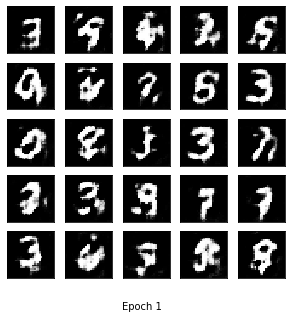

After epoch: 2 Generator loss: 2.8993614 Discriminator loss: 1.0953077 Time taken for epoch: 51.336538553237915

Figure saved for epoch: 2


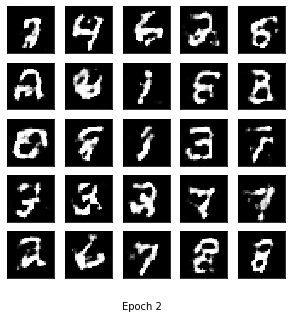

After epoch: 3 Generator loss: 3.7909038 Discriminator loss: 1.0107552 Time taken for epoch: 50.46545696258545

Figure saved for epoch: 3


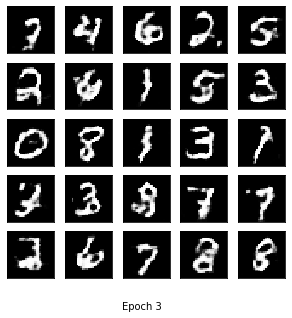

After epoch: 4 Generator loss: 3.7275584 Discriminator loss: 1.0379169 Time taken for epoch: 49.692766427993774

Figure saved for epoch: 4


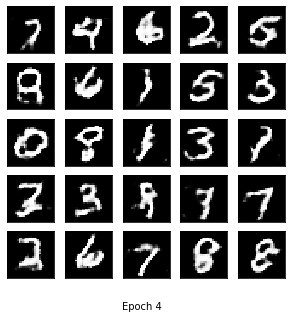

After epoch: 5 Generator loss: 3.164165 Discriminator loss: 1.0858581 Time taken for epoch: 51.52879309654236

Figure saved for epoch: 5


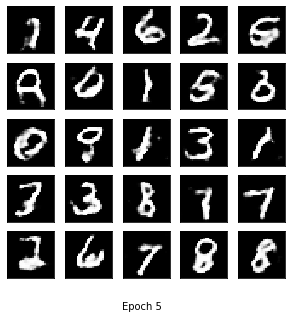

After epoch: 6 Generator loss: 2.8421369 Discriminator loss: 1.1027923 Time taken for epoch: 51.35849928855896

Figure saved for epoch: 6


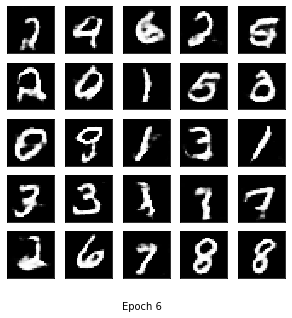

After epoch: 7 Generator loss: 2.6750493 Discriminator loss: 1.1105806 Time taken for epoch: 51.61815357208252

Figure saved for epoch: 7


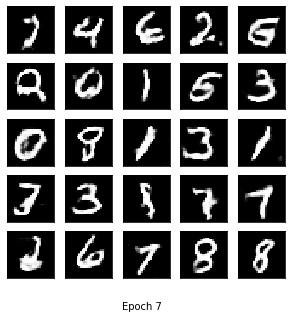

After epoch: 8 Generator loss: 2.6317017 Discriminator loss: 1.1169568 Time taken for epoch: 51.428990602493286

Figure saved for epoch: 8


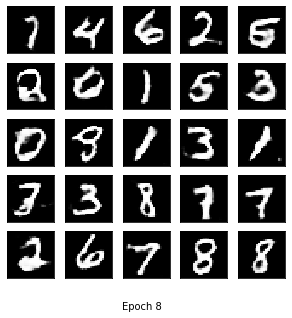

After epoch: 9 Generator loss: 2.5721476 Discriminator loss: 1.1135873 Time taken for epoch: 51.67139720916748

Figure saved for epoch: 9


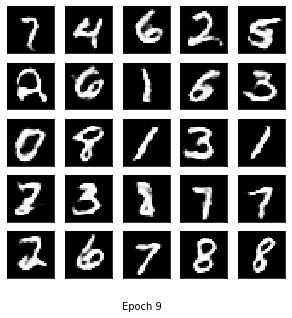

After epoch: 10 Generator loss: 2.63414 Discriminator loss: 1.1105545 Time taken for epoch: 51.50148916244507

Figure saved for epoch: 10


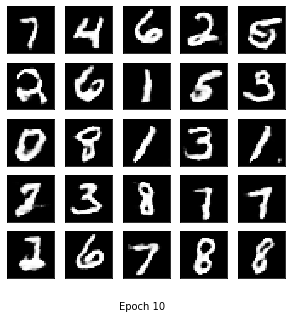

After epoch: 11 Generator loss: 2.6518292 Discriminator loss: 1.1065013 Time taken for epoch: 51.5496129989624

Figure saved for epoch: 11


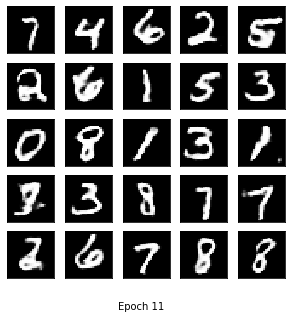

After epoch: 12 Generator loss: 2.6306872 Discriminator loss: 1.1030396 Time taken for epoch: 51.60083985328674

Figure saved for epoch: 12


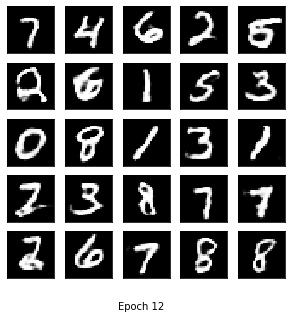

After epoch: 13 Generator loss: 2.658802 Discriminator loss: 1.0937978 Time taken for epoch: 51.56542181968689

Figure saved for epoch: 13


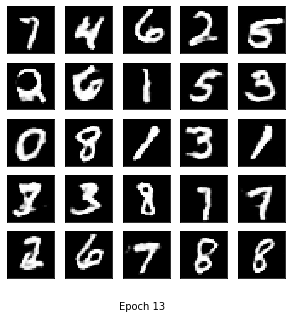

After epoch: 14 Generator loss: 2.7859886 Discriminator loss: 1.0850288 Time taken for epoch: 51.54991674423218

Figure saved for epoch: 14


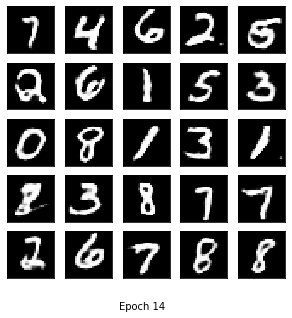

After epoch: 15 Generator loss: 2.7722588 Discriminator loss: 1.0880349 Time taken for epoch: 51.6120285987854

Figure saved for epoch: 15


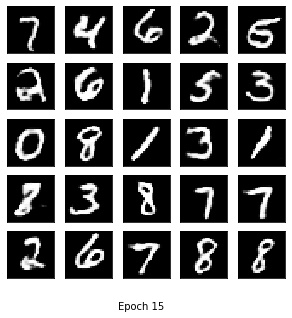

After epoch: 16 Generator loss: 2.7957835 Discriminator loss: 1.0882809 Time taken for epoch: 51.56603932380676

Figure saved for epoch: 16


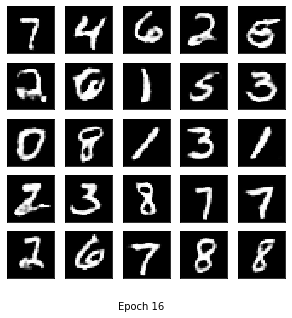

After epoch: 17 Generator loss: 2.8343866 Discriminator loss: 1.07125 Time taken for epoch: 51.57632064819336

Figure saved for epoch: 17


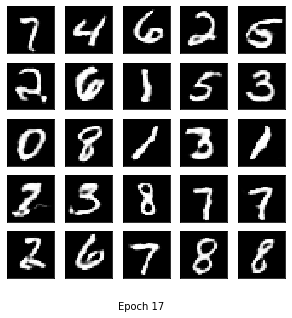

After epoch: 18 Generator loss: 2.936779 Discriminator loss: 1.0673771 Time taken for epoch: 51.43603444099426

Figure saved for epoch: 18


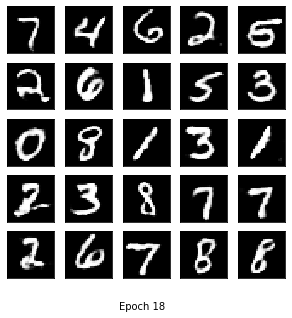

After epoch: 19 Generator loss: 2.9913614 Discriminator loss: 1.0576586 Time taken for epoch: 51.660322189331055

Figure saved for epoch: 19


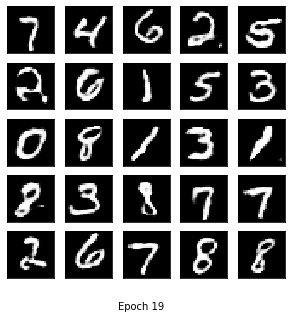

After epoch: 20 Generator loss: 3.0273457 Discriminator loss: 1.0548171 Time taken for epoch: 51.47203254699707

Figure saved for epoch: 20


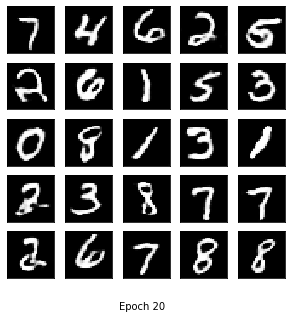

After epoch: 21 Generator loss: 3.0956695 Discriminator loss: 1.053572 Time taken for epoch: 51.61502933502197

Figure saved for epoch: 21


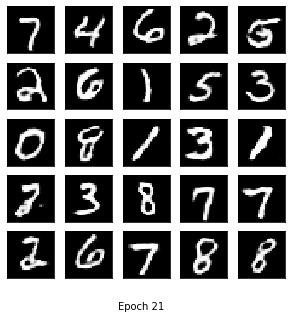

After epoch: 22 Generator loss: 3.144383 Discriminator loss: 1.0402048 Time taken for epoch: 51.56216096878052

Figure saved for epoch: 22


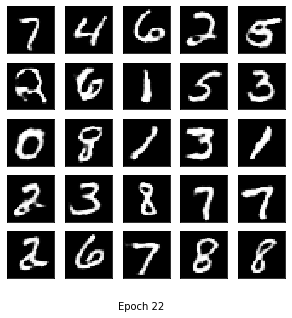

After epoch: 23 Generator loss: 3.1898468 Discriminator loss: 1.0350084 Time taken for epoch: 51.45507264137268

Figure saved for epoch: 23


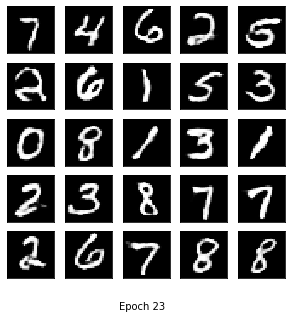

After epoch: 24 Generator loss: 3.3078482 Discriminator loss: 1.0277941 Time taken for epoch: 51.62687373161316

Figure saved for epoch: 24


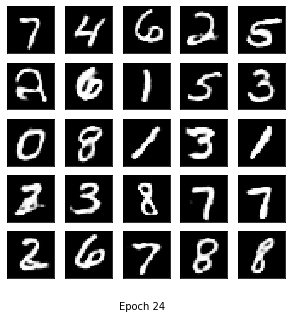

After epoch: 25 Generator loss: 3.3314242 Discriminator loss: 1.0327961 Time taken for epoch: 51.51422119140625

Figure saved for epoch: 25


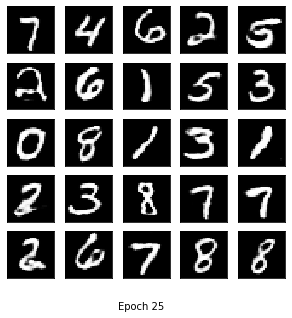

After epoch: 26 Generator loss: 3.4631631 Discriminator loss: 1.0121671 Time taken for epoch: 51.47713351249695

Figure saved for epoch: 26


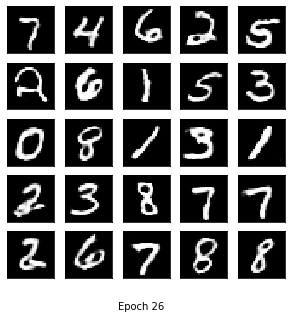

After epoch: 27 Generator loss: 3.5049925 Discriminator loss: 1.0113999 Time taken for epoch: 51.439481019973755

Figure saved for epoch: 27


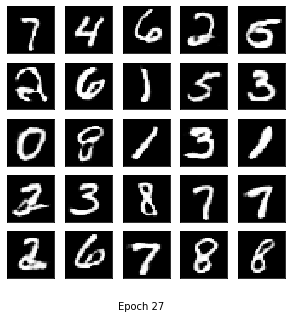

After epoch: 28 Generator loss: 3.7217922 Discriminator loss: 0.99395376 Time taken for epoch: 51.5489718914032

Figure saved for epoch: 28


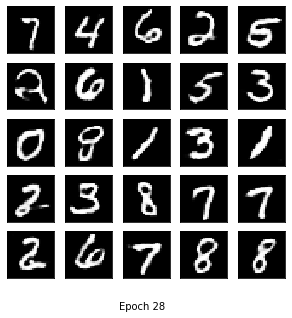

After epoch: 29 Generator loss: 3.6890404 Discriminator loss: 0.9938626 Time taken for epoch: 51.58894944190979

Figure saved for epoch: 29


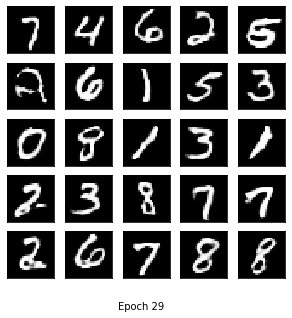

After epoch: 30 Generator loss: 3.8173356 Discriminator loss: 0.97881156 Time taken for epoch: 51.5891318321228

Figure saved for epoch: 30


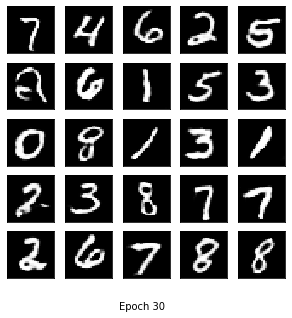

After epoch: 31 Generator loss: 3.8637621 Discriminator loss: 0.9806622 Time taken for epoch: 49.852092027664185

Figure saved for epoch: 31


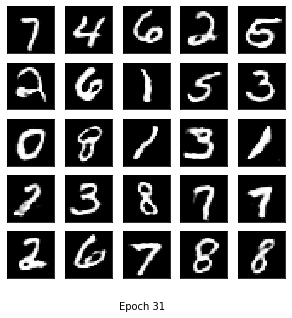

After epoch: 32 Generator loss: 3.9773915 Discriminator loss: 0.96887475 Time taken for epoch: 49.84496188163757

Figure saved for epoch: 32


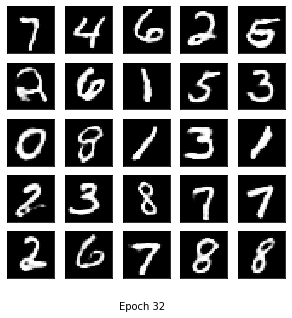

After epoch: 33 Generator loss: 4.0102415 Discriminator loss: 0.9802878 Time taken for epoch: 49.89205980300903

Figure saved for epoch: 33


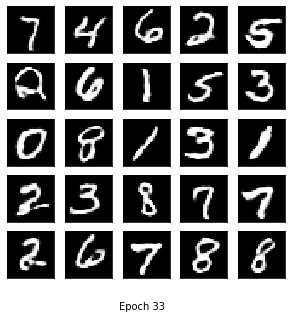

After epoch: 34 Generator loss: 4.065986 Discriminator loss: 0.95950645 Time taken for epoch: 49.81393814086914

Figure saved for epoch: 34


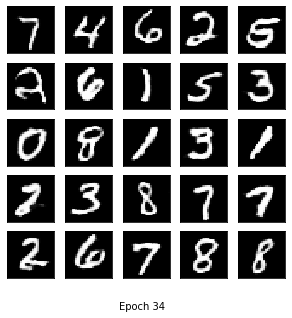

After epoch: 35 Generator loss: 4.2307944 Discriminator loss: 0.95847213 Time taken for epoch: 49.77763319015503

Figure saved for epoch: 35


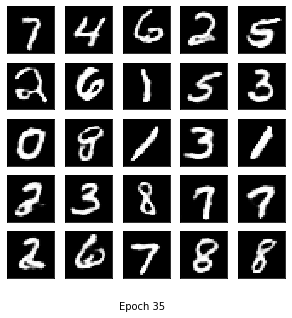

After epoch: 36 Generator loss: 4.2883663 Discriminator loss: 0.9495689 Time taken for epoch: 49.827749252319336

Figure saved for epoch: 36


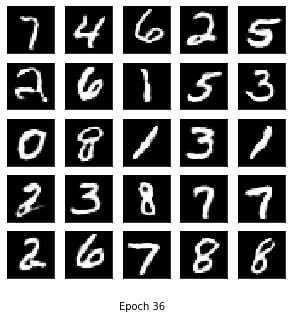

After epoch: 37 Generator loss: 4.39593 Discriminator loss: 0.9419014 Time taken for epoch: 51.67446208000183

Figure saved for epoch: 37


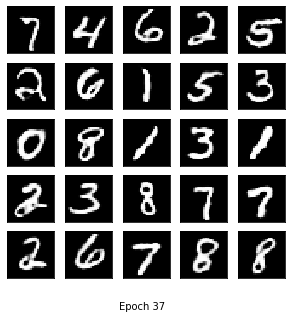

After epoch: 38 Generator loss: 4.426221 Discriminator loss: 0.940106 Time taken for epoch: 51.69764041900635

Figure saved for epoch: 38


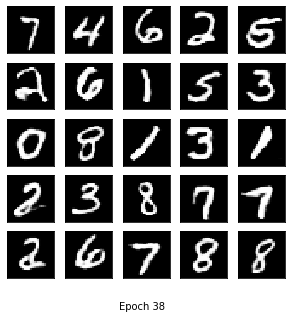

After epoch: 39 Generator loss: 4.4916515 Discriminator loss: 0.93736863 Time taken for epoch: 51.56748723983765

Figure saved for epoch: 39


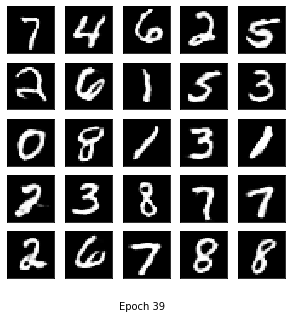

After epoch: 40 Generator loss: 4.634896 Discriminator loss: 0.92637944 Time taken for epoch: 51.65528678894043

Figure saved for epoch: 40


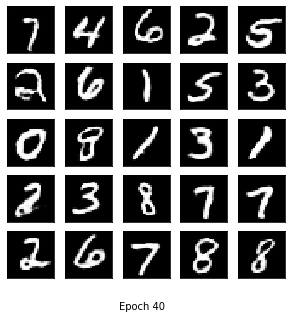

After epoch: 41 Generator loss: 4.7046103 Discriminator loss: 0.9285004 Time taken for epoch: 51.7221839427948

Figure saved for epoch: 41


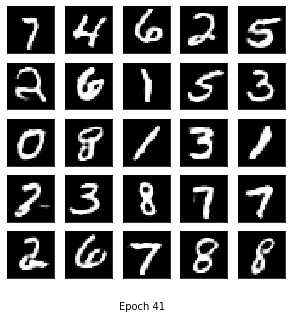

After epoch: 42 Generator loss: 4.828459 Discriminator loss: 0.92119366 Time taken for epoch: 51.55877494812012

Figure saved for epoch: 42


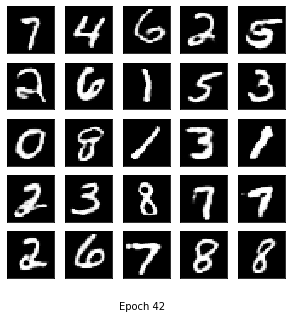

After epoch: 43 Generator loss: 4.8366694 Discriminator loss: 0.916426 Time taken for epoch: 51.54613280296326

Figure saved for epoch: 43


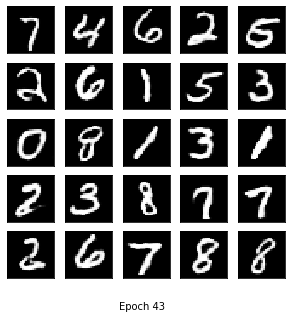

After epoch: 44 Generator loss: 4.9565907 Discriminator loss: 0.90564805 Time taken for epoch: 51.47795391082764

Figure saved for epoch: 44


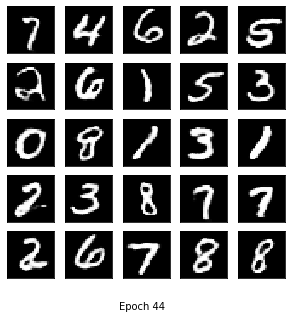

After epoch: 45 Generator loss: 5.031873 Discriminator loss: 0.91008824 Time taken for epoch: 51.468371629714966

Figure saved for epoch: 45


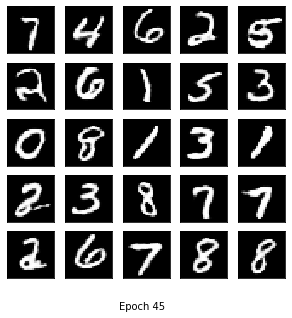

After epoch: 48 Generator loss: 5.270562 Discriminator loss: 0.8928596 Time taken for epoch: 49.91999650001526

Figure saved for epoch: 48


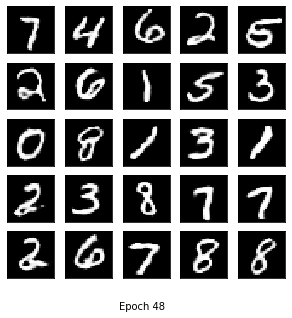

After epoch: 49 Generator loss: 5.2102165 Discriminator loss: 0.8870531 Time taken for epoch: 49.8624324798584

Figure saved for epoch: 49


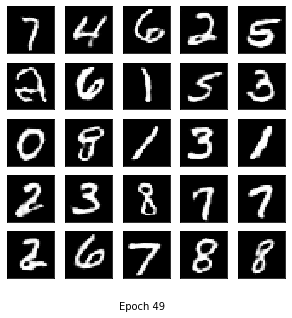

After epoch: 50 Generator loss: 5.420701 Discriminator loss: 0.8856213 Time taken for epoch: 49.80127143859863

Figure saved for epoch: 50


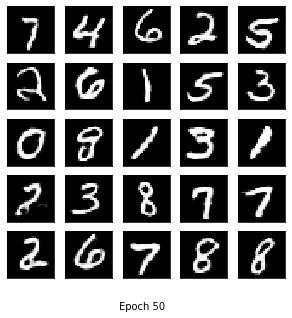


... Training finish ...

 Total time taken : 2559.9089806079865
Histogram saved


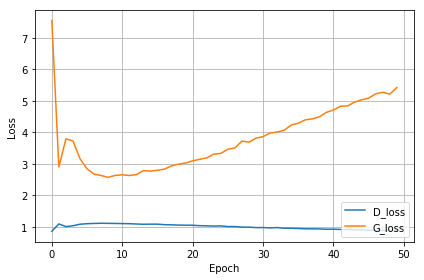

In [25]:
solver = train_GAN(128,50)

In [1]:
# To add -
#feature matching loss
#Minibatch discrimination